In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

In [3]:
print("Shape of Training data: ", df_train.shape)
print("Shape of Testing data: ", df_test.shape)

Shape of Training data:  (20800, 5)
Shape of Testing data:  (5200, 4)


In [4]:
class_labels  = df_train['label'].values.tolist()
class_labels_set = set(class_labels)

freq_list = []

for c in class_labels_set:
    freq_list.append(class_labels.count(c))

print ('Freq',freq_list)
print ('number',class_labels_set)

Freq [10387, 10413]
number {0, 1}


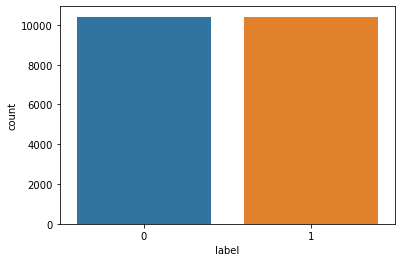

In [5]:
import seaborn as sns
ax = sns.countplot(x="label",data=df_train)

In [6]:
df_train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [7]:
df_train.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

we can prolly drop "title", 'author'

In [8]:
df = df_train.drop(["id", "title", "author"], axis = 1)

In [9]:
# how many null values in the dataset
print("Null values in train data:")
print(df_train.isnull().sum())
print('\n\n')

print("Null values in test data:")
print(df_test.isnull().sum())

Null values in train data:
id           0
title      558
author    1957
text        39
label        0
dtype: int64



Null values in test data:
id          0
title     122
author    503
text        7
dtype: int64


<AxesSubplot:>

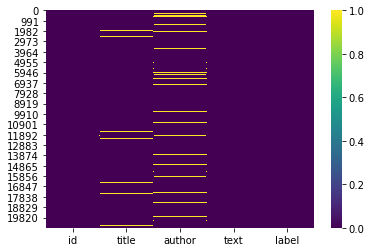

In [10]:
sns.heatmap(df_train.isnull(), cmap='viridis')

In [11]:
df_d= df.dropna()

In [12]:
df_d.isnull().sum()

text     0
label    0
dtype: int64

<AxesSubplot:>

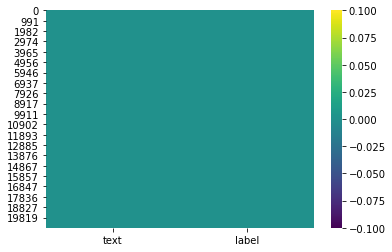

In [13]:
sns.heatmap(df_d.isnull(), cmap='viridis')

In [14]:
df=df_d

In [15]:
df = df.sample(frac = 1) ## random shuffle

In [16]:
df.head(10)

,text,label
12789,There are those who refuse to believe what is ...,1
8534,Dispatches from STEPHEN LENDMAN H aving closed...,1
12473,"Morley Safer, a CBS television correspondent w...",0
14092,This Viral Video Has Hillary Running Scared Th...,1
15539,Doctors Restore Ken Burns’ Full-Color Vision A...,1
15390,"By Claire Bernish On Thursday, police from no ...",1
2167,Bill’s past \nBill Clinton’s controversial pas...,1
20720,18 mins ago 2 Views 0 Comments 0 Likes New Z...,1
3242,We Are Change \nIn the fourth undercover video...,1
19446,(Want to get this briefing by email? Here’s t...,0


In [17]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [18]:
df.columns

Index(['text', 'label'], dtype='object')

In [19]:
df.head()

,text,label
0,There are those who refuse to believe what is ...,1
1,Dispatches from STEPHEN LENDMAN H aving closed...,1
2,"Morley Safer, a CBS television correspondent w...",0
3,This Viral Video Has Hillary Running Scared Th...,1
4,Doctors Restore Ken Burns’ Full-Color Vision A...,1


In [20]:
x = df["text"]
y = df["label"]
x.shape, y.shape

((20761,), (20761,))

In [21]:
x

0        There are those who refuse to believe what is ...
1        Dispatches from STEPHEN LENDMAN H aving closed...
2        Morley Safer, a CBS television correspondent w...
3        This Viral Video Has Hillary Running Scared Th...
4        Doctors Restore Ken Burns’ Full-Color Vision A...
                               ...                        
20756    After Trump’s Prediction Was Brushed Off Over ...
20757    Chinese state publications are using leftist p...
20758    The relationship may have faded long ago, but ...
20759    MOSCOW  —   A shipment of Kalashnikov rifles, ...
20760    5   Hundreds of far-right protesters marched t...
Name: text, Length: 20761, dtype: object

In [22]:
y

0        1
1        1
2        0
3        1
4        1
        ..
20756    1
20757    0
20758    0
20759    0
20760    1
Name: label, Length: 20761, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [26]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuGn):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Passive Agressive Classifier

In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=10000, random_state=1,tol=1e-3).fit(xv_train, y_train)

In [28]:
y_pred_pa = model.predict(xv_test)
print(model.score(xv_test, y_test))

0.9645540358312464


In [29]:
print(classification_report(y_test,y_pred_pa))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2630
           1       0.96      0.96      0.96      2561

    accuracy                           0.96      5191
   macro avg       0.96      0.96      0.96      5191
weighted avg       0.96      0.96      0.96      5191



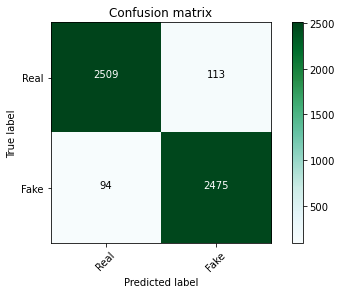

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred_pa)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [38]:
plt.savefig('Passive_Agressive_Classifier.jpg')

<Figure size 432x288 with 0 Axes>

## Multi-Layer Perceptron

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1, max_iter=300).fit(xv_train, y_train)

In [34]:
clf.predict_proba(xv_test[:1])

array([[9.99995772e-01, 4.22801756e-06]])

In [35]:
pred_ann= clf.predict(xv_test)
clf.score(xv_test, y_test)

0.9624349836255057

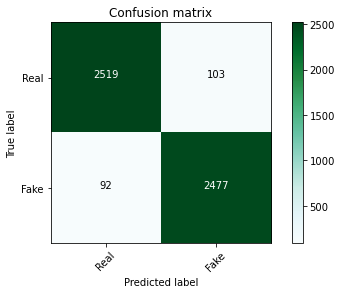

In [36]:
cm = metrics.confusion_matrix(y_test, pred_ann)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [40]:
print(classification_report(y_test,pred_ann))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2622
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5191
   macro avg       0.96      0.96      0.96      5191
weighted avg       0.96      0.96      0.96      5191



In [41]:
plt.savefig('Multi-Layer-Perceptron.jpg')

<Figure size 432x288 with 0 Axes>

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [44]:
pred_lr=LR.predict(xv_test)

In [45]:
LR.score(xv_test, y_test)

0.9422076671161626

In [46]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2622
           1       0.94      0.95      0.94      2569

    accuracy                           0.94      5191
   macro avg       0.94      0.94      0.94      5191
weighted avg       0.94      0.94      0.94      5191



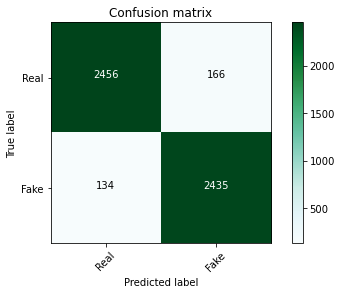

In [47]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [48]:
plt.savefig('Logistic_Regression.jpg')

<Figure size 432x288 with 0 Axes>

## MultinomialNB

In [49]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(xv_train, y_train)
pred = NB.predict(xv_test)
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(xv_test, y_test)))

Accuracy of NB classifier on test set: 0.84


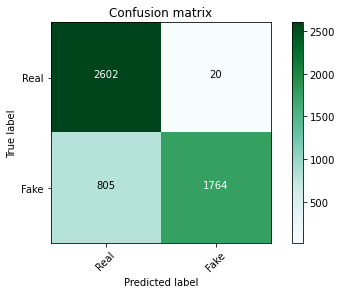

In [50]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      2622
           1       0.99      0.69      0.81      2569

    accuracy                           0.84      5191
   macro avg       0.88      0.84      0.84      5191
weighted avg       0.88      0.84      0.84      5191



In [52]:
plt.savefig('MultinomialNB.jpg')

<Figure size 432x288 with 0 Axes>

## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [55]:
pred_dt = DT.predict(xv_test)

In [56]:
DT.score(xv_test, y_test)

0.8792140242727798

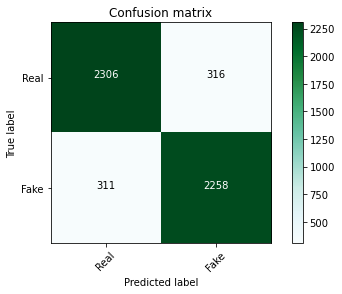

In [57]:
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [58]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2622
           1       0.88      0.88      0.88      2569

    accuracy                           0.88      5191
   macro avg       0.88      0.88      0.88      5191
weighted avg       0.88      0.88      0.88      5191



In [59]:
plt.savefig('Decision_Tree.jpg')

<Figure size 432x288 with 0 Axes>

## GradientBoostingClassifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
pred_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2622
           1       0.91      0.94      0.93      2569

    accuracy                           0.92      5191
   macro avg       0.92      0.92      0.92      5191
weighted avg       0.93      0.92      0.92      5191



In [61]:
print(GBC.score(xv_test, y_test))

0.9244846850317858


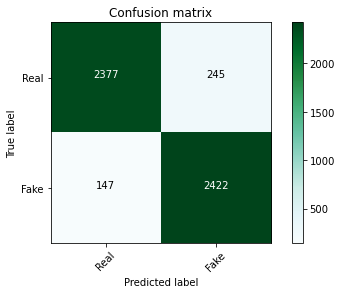

In [65]:
cm = metrics.confusion_matrix(y_test, pred_gbc)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [66]:
plt.savefig('GradientBoostingClassifier.jpg')

<Figure size 432x288 with 0 Axes>

## Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=50, criterion="entropy")
RFC.fit(xv_train, y_train)
pred_RFC = RFC.predict(xv_test)
print(RFC.score(xv_test, y_test))
print(classification_report(y_test, pred_RFC))

0.9027162396455404
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2622
           1       0.92      0.88      0.90      2569

    accuracy                           0.90      5191
   macro avg       0.90      0.90      0.90      5191
weighted avg       0.90      0.90      0.90      5191



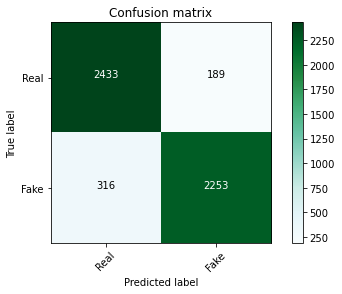

In [69]:
cm = metrics.confusion_matrix(y_test, pred_RFC)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [70]:
plt.savefig('Random_Forest_Classifier.jpg')

<Figure size 432x288 with 0 Axes>

## KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.6609516470814872
              precision    recall  f1-score   support

           0       0.95      0.35      0.51      2622
           1       0.60      0.98      0.74      2569

    accuracy                           0.66      5191
   macro avg       0.77      0.66      0.62      5191
weighted avg       0.77      0.66      0.62      5191



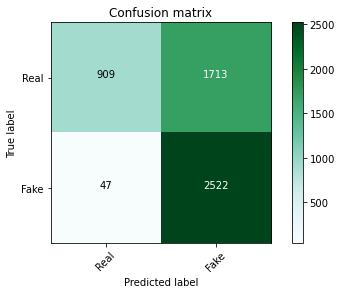

In [93]:
#k=3
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

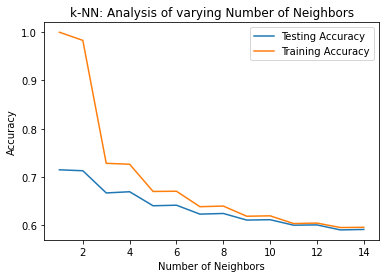

In [86]:
plt.title('k-NN: Analysis of varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [87]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.7127721055673281
              precision    recall  f1-score   support

           0       0.90      0.48      0.62      2594
           1       0.64      0.95      0.77      2597

    accuracy                           0.71      5191
   macro avg       0.77      0.71      0.70      5191
weighted avg       0.77      0.71      0.70      5191



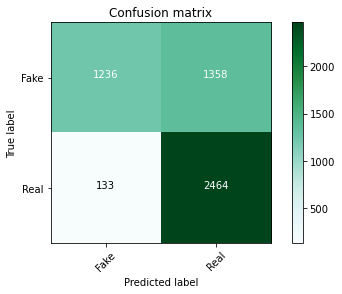

In [88]:
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [94]:
plt.savefig('KNN.jpg')

<Figure size 432x288 with 0 Axes>

## SVM -Linear Kernel

In [74]:
from sklearn import svm, metrics

svm_ = svm.SVC(kernel="linear")
svm_.fit(xv_train, y_train)
pred_svm = svm_.predict(xv_test)
print(svm_.score(xv_test, y_test))
print(classification_report(y_test, pred_svm))

0.9578115969947987
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2622
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5191
   macro avg       0.96      0.96      0.96      5191
weighted avg       0.96      0.96      0.96      5191



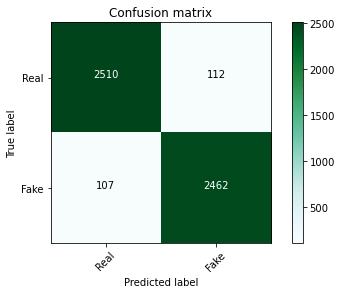

In [75]:
cm = metrics.confusion_matrix(y_test, pred_svm)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [76]:
plt.savefig('SVM.jpg')

<Figure size 432x288 with 0 Axes>

## AdaBoost

In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [78]:
clf.fit(xv_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [79]:
pred_adaBoost = clf.predict(xv_test)
print(clf.score(xv_test, y_test))

0.9408591793488731


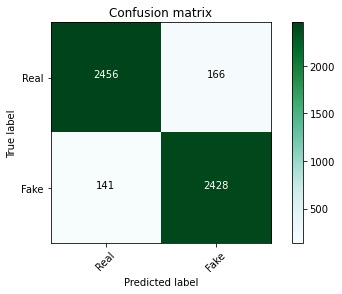

In [80]:
cm = metrics.confusion_matrix(y_test, pred_adaBoost)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [81]:
print(classification_report(y_test,pred_adaBoost))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2622
           1       0.94      0.95      0.94      2569

    accuracy                           0.94      5191
   macro avg       0.94      0.94      0.94      5191
weighted avg       0.94      0.94      0.94      5191



In [82]:
plt.savefig('AdaBoost.jpg')

<Figure size 432x288 with 0 Axes>

## XGBoost

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(xv_train, y_train)

In [84]:
pred_XGBoost = clf.predict(xv_test)

In [85]:
clf.score(xv_test, y_test)

0.9260258139086881

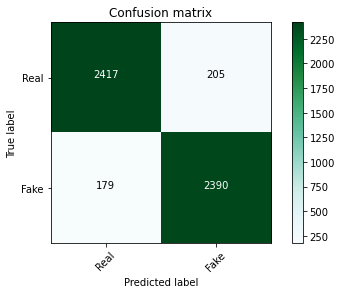

In [86]:
cm = metrics.confusion_matrix(y_test, pred_XGBoost)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [87]:
print(classification_report(y_test,pred_XGBoost))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2622
           1       0.92      0.93      0.93      2569

    accuracy                           0.93      5191
   macro avg       0.93      0.93      0.93      5191
weighted avg       0.93      0.93      0.93      5191



In [88]:
plt.savefig('XGBoost.jpg')

<Figure size 432x288 with 0 Axes>